In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Decision_Tree\\Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [11]:
df.iloc[:,0]=le.fit_transform(df.iloc[:,0])
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,5]=le.fit_transform(df.iloc[:,5])


In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [118]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=10,contamination=0.03)
clf.fit(df)

IsolationForest(contamination=0.03, random_state=10)

In [119]:
df['scores']=clf.decision_function(df)

In [120]:
df['anomaly']=clf.predict(df.iloc[:,0:8])

In [121]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,scores,anomaly
0,0,2,68833,50047,10,1,0.116711,1
1,1,0,33700,134075,18,1,0.128921,1
2,0,1,36925,160205,30,1,0.089599,1
3,1,2,50190,193264,15,1,0.103314,1
4,0,1,81002,27533,28,0,0.092480,1


In [122]:
df[df['anomaly']==-1]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,scores,anomaly
19,0,2,10987,126953,30,1,-0.010404,-1
24,0,0,38239,28495,30,0,-0.003064,-1
29,1,0,94033,41863,30,1,-0.013683,-1
38,0,2,14912,177575,3,0,-0.000712,-1
119,0,0,97318,47202,30,1,-0.012097,-1
145,0,0,33962,197422,2,1,-0.007590,-1
159,1,2,62209,28504,1,0,0.014315,-1
161,1,1,93659,185596,30,1,-0.003089,-1
168,0,0,18199,167629,30,0,-0.018405,-1
183,0,2,84836,39523,30,1,0.001950,-1


In [20]:
df1=df.drop(df.index[[29,34,112,119,126,145,161,168,209,280,414,541]],axis=0)


In [21]:
from sklearn.preprocessing import Binarizer

In [22]:
bin=Binarizer(threshold=30000)

In [23]:
col=df1['Taxable.Income'].values
col=col.reshape(-1,1)

In [25]:
col;

In [27]:
df2=df1.drop(df1.columns[[2]],axis=1)
x=df2.iloc[:,:]
y=bin.fit_transform(col)

In [32]:
columns=df2.columns

<ipython-input-33-ac2d857d7091>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


[0.03140044 0.06199142 0.28709745 0.23649407 0.03957668 0.34343993
 0.        ]


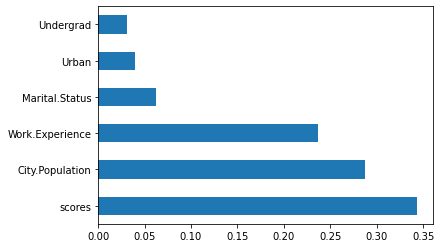

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [61]:
df2.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,scores,anomaly
0,0,2,50047,10,1,0.083153,1
1,1,0,134075,18,1,0.068769,1
2,0,1,160205,30,1,0.028989,1
3,1,2,193264,15,1,0.055083,1
4,0,1,27533,28,0,0.031181,1


In [77]:
df3=df2.drop(df2.columns[[0,4,5,6]],axis=1)
x1=df3.iloc[:,:]

In [78]:
x1

,Marital.Status,City.Population,Work.Experience
0,2,50047,10
1,0,134075,18
2,1,160205,30
3,2,193264,15
4,1,27533,28
...,...,...,...
595,0,39492,7
596,0,55369,2
597,0,154058,0
598,1,180083,17


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [79]:
kfold=KFold(n_splits=4,random_state=None)
cart=DecisionTreeClassifier(max_depth=3)
num_trees=100
model1=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=0)

results=cross_val_score(model1,x1,y,cv=kfold)
print(results.mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

0.7976190476190476


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
max_features=2
model2=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result=cross_val_score(model2,x,y,cv=kfold)
print(result.mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector 

0.7908163265306122


In [99]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(n_estimators=num_trees,random_state=None)
result=cross_val_score(model3,x1,y,cv=kfold)
print(result.mean())

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

0.7738095238095238


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [76]:
estimators = []
model4 = LogisticRegression(max_iter=500)
estimators.append(('bagging', model1))
estimators.append(('RandomForest', model2))
estimators.append(('Adaboost', model3))
estimators.append(('logistic', model4))
#model5 = DecisionTreeClassifier()
#estimators.append(('cart', model5))
model6 = SVC()
estimators.append(('svm', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x1, y, cv=kfold)
print(results.mean())


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

0.7942176870748299
